## 4. Multiscale Modelling

Current geologic modelling allows building a single model at a predetermined scale which is limited to that specific purpose and have an inherent risk to be used to make other assessments. This motivates us to research how to properly subsample geologic data to be able to automatically generate multiscale models that change as we try to answer different geological questions and as we visualize different scales.
<img src='../graphics/multiscale modelling1.png'>

The current workflow we are working on covers the following steps: <br>
<img src='../graphics/multiscale modelling.png'>
This notebook will cover the first three steps.
The last three steps will be tacked in the map2loop notebook.

## Hierarchical Filtering  + Vector Simplification

In [113]:
from map2loop import m2l_subsampling 
import geopandas as gpd
import numpy as np
import shapely
import matplotlib.pyplot as plt

In [139]:
%run -i "../test_data_vector/m2l_subsampling_config.py"

## Hierarchical Filtering

Let's take a look at the Western Australia dataset:

In [115]:
wa = gpd.read_file(western_australia)
wa.fillna('empty', inplace=True)

Notice that there are mutiple fields that we can use to filter our data:

In [116]:
for col in wa.columns: 
    print(col) 

CODE
UNITNAME
DESCRIPTN
SYMBOL
SORT
LITHSTRTNO
CODE_1
UNITNAME_1
GSWASTATUS
RANK
DESCRIPT_1
PARENTCODE
PARENTNAME
ROCKTYPE1
LITHNAME1
QUALIFIER1
QUALIFIER2
MIXEDROCK
ROCKTYPE2
LITHNAME2
MIXEDQUAL1
MIXEDQUAL2
WASTRAUNIT
SUPERSUITE
SUITE
SUPERGROUP
GROUP_
SUBGROUP
FORMATION
MEMBER
BED
STATE
WATECTUNIT
SSUITE_TEC
SUITE_TEC
CRATON
SUPERTERRA
CRATON_TER
DOMAIN_
GREENSTONE
SUPERBASIN
BASIN
SUBBASIN
SUBBASIN_E
OROGEN
PROVINCE
PROV_TZONE
TECT_SUBDI
OROG_FOR
OROG_FORSU
IN_OUTLIER
EVENTS
AGEFROM
AGETO
MAX_AGE_MA
MAXUNCERTY
MIN_AGE_MA
MINUNCERTY
MAX_AGE_DA
MIN_AGE_DA
geometry


<Figure size 432x288 with 0 Axes>

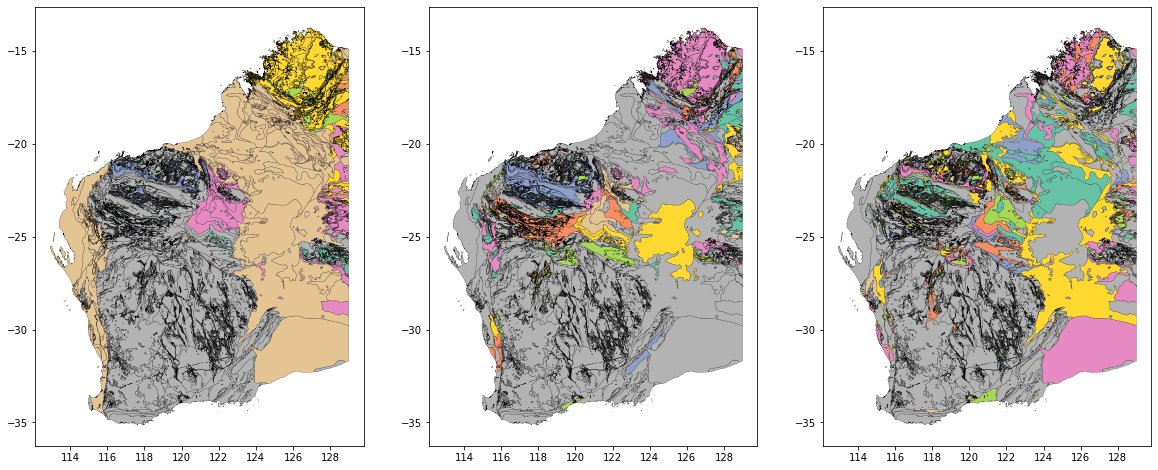

<Figure size 432x288 with 0 Axes>

In [117]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 16))
ax1=wa.plot(column='WATECTUNIT',figsize=(7,7), edgecolor='#000000',linewidth=0.2, cmap='Set2', ax=ax1)
ax2=wa.plot(column='GROUP_',figsize=(7,7), edgecolor='#000000',linewidth=0.2, cmap='Set2', ax=ax2)
ax3=wa.plot(column='FORMATION',figsize=(7,7), edgecolor='#000000',linewidth=0.2, cmap='Set2', ax=ax3)
plt.figure()

<Figure size 432x288 with 0 Axes>

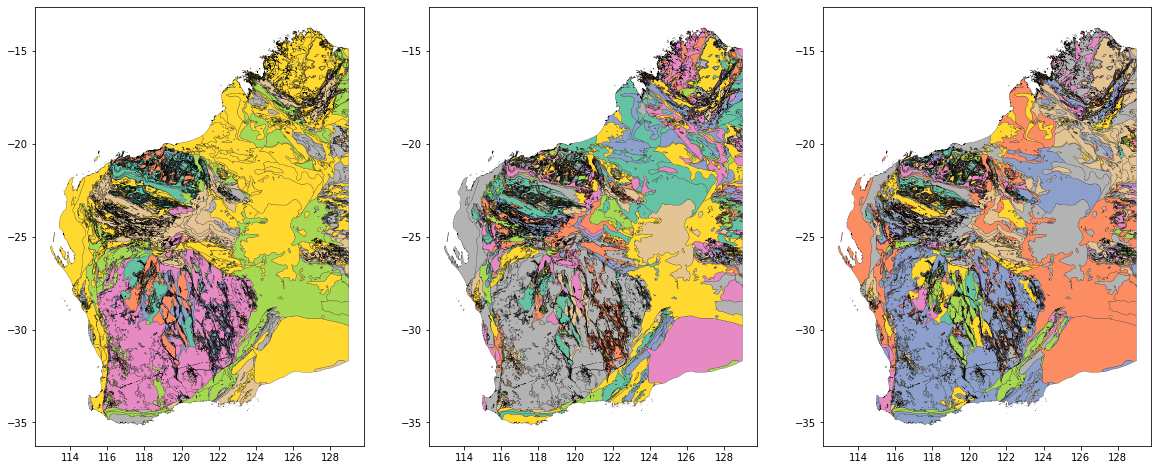

<Figure size 432x288 with 0 Axes>

In [118]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 16))
ax1=wa.plot(column='CODE',figsize=(7,7), edgecolor='#000000',linewidth=0.2, cmap='Set2', ax=ax1)
ax2=wa.plot(column='UNITNAME',figsize=(7,7), edgecolor='#000000',linewidth=0.2, cmap='Set2', ax=ax2)
ax3=wa.plot(column='DESCRIPTN',figsize=(7,7), edgecolor='#000000',linewidth=0.2, cmap='Set2', ax=ax3)
plt.figure()

## Quick look into the data

Today, we will be working with a smaller dataset in the Yalgoo-Singleton Greenstone Belt. It has a rich data set which includes the recent Geological Survey of Western Australia (GSWA) 1:100K geologic mapping data.<br><br> The Yalgoo-Singleton is a highly mineralized, geologically complex, largely heterogenous greenstone belt located at the western Youanmi Terrane, Yilgarn Craton. It surrounds the Yalgoo Dome which is a prominent, 100 km long, elliptical granitic dome made of a concentric core-rim distribution of a migmatite core and granitoid intrusions.<br><br>
The area is also strucutrally affected by a 1–2 km wide high-strain zone, the Badja décollement which juxtaposes the greenstones against the granitic dome. Transpressive shear zones to the east host syn-tectonic metagranitic suites. <br><br> Finnaly, the the Yalgoo Dome, syn-tectonic granites and the transpressive shear zones to the eas are intruded by post-tectonic granites intruded.
<img src='../graphics/ygsb.png'>

In [119]:
ygsb = gpd.read_file(geology_file)
ygsb

,CODE,UNITNAME,DESCRIPTN,SYMBOL,SORT,LITHSTRTNO,CODE_1,UNITNAME_1,GSWASTATUS,RANK,...,EVENTS,AGEFROM,AGETO,MAX_AGE_MA,MAXUNCERTY,MIN_AGE_MA,MINUNCERTY,MAX_AGE_DA,MIN_AGE_DA,geometry
0,A-o-YYO,Youanmi Terrane greenstones,Mafic intrusive rock dominant; metamorphosed,A-o-YYO; Youanmi Terrane greenstones,995,1103,A-o-YYO,Youanmi Terrane greenstones,Informal,Supersuite,...,Yilgarn Craton granite magmatism (3010 - 2600 ...,Mesoarchean,Neoarchean,3131.0,0.0,2700.0,0.0,Inferred,Inferred,POLYGON Z ((447823.3466279824 6793304.54047331...
1,A-o-YYO,Youanmi Terrane greenstones,Mafic intrusive rock dominant; metamorphosed,A-o-YYO; Youanmi Terrane greenstones,995,1103,A-o-YYO,Youanmi Terrane greenstones,Informal,Supersuite,...,Yilgarn Craton granite magmatism (3010 - 2600 ...,Mesoarchean,Neoarchean,3131.0,0.0,2700.0,0.0,Inferred,Inferred,POLYGON Z ((449979.1330342802 6772687.40709108...
2,A-mu-YYO,Youanmi Terrane greenstones,"Metamorphosed ultramafic rock, undivided; typi...",A-mu-YYO; Youanmi Terrane greenstones,988,1602,A-mu-YYO,Youanmi Terrane greenstones,Informal,Group,...,Yilgarn Craton granite magmatism (3010 - 2600 ...,Mesoarchean,Neoarchean,3131.0,0.0,2700.0,0.0,Inferred,Inferred,POLYGON Z ((471104.2701248816 6869061.18056475...
3,A-b-YYO,Youanmi Terrane greenstones,Mafic volcanic rock with minor mafic and ultra...,A-b-YYO; Youanmi Terrane greenstones,996,3699,A-b-YYO,Youanmi Terrane greenstones,Informal,Group,...,Yilgarn Craton granite magmatism (3010 - 2600 ...,Mesoarchean,Neoarchean,3131.0,0.0,2700.0,0.0,Inferred,Inferred,POLYGON Z ((437088.4345811683 6767073.36256263...
4,A-o-YYO,Youanmi Terrane greenstones,Mafic intrusive rock dominant; metamorphosed,A-o-YYO; Youanmi Terrane greenstones,995,1103,A-o-YYO,Youanmi Terrane greenstones,Informal,Supersuite,...,Yilgarn Craton granite magmatism (3010 - 2600 ...,Mesoarchean,Neoarchean,3131.0,0.0,2700.0,0.0,Inferred,Inferred,POLYGON Z ((452268.3767408403 6840790.75366134...
5,A-mw-YYO,Youanmi Terrane greenstones,"Metamorphosed mafic igneous rock, undivided",A-mw-YYO; Youanmi Terrane greenstones,980,638,A-mw-YYO,Youanmi Terrane greenstones,Informal,Group,...,Yilgarn Craton granite magmatism (3010 - 2600 ...,Mesoarchean,Neoarchean,3131.0,0.0,2700.0,0.0,Inferred,Inferred,POLYGON Z ((497867.7445266633 6780004.52379000...
6,A-o-YYO,Youanmi Terrane greenstones,Mafic intrusive rock dominant; metamorphosed,A-o-YYO; Youanmi Terrane greenstones,995,1103,A-o-YYO,Youanmi Terrane greenstones,Informal,Supersuite,...,Yilgarn Craton granite magmatism (3010 - 2600 ...,Mesoarchean,Neoarchean,3131.0,0.0,2700.0,0.0,Inferred,Inferred,POLYGON Z ((473768.8987342149 6777233.98899716...
7,A-mn-Y,Yilgarn Craton metamorphic unit,"Gneiss, undivided",A-mn-Y; Yilgarn Craton metamorphic unit,860,3706,A-mn-Y,Yilgarn Craton metamorphic unit,Informal,Group,...,Yilgarn Craton granite magmatism (3010 - 2600 ...,Mesoarchean,Neoarchean,2950.0,0.0,2640.0,0.0,Inferred,Inferred,POLYGON Z ((447983.2901012308 6828033.17552592...
8,A-b-YYO,Youanmi Terrane greenstones,Mafic volcanic rock with minor mafic and ultra...,A-b-YYO; Youanmi Terrane greenstones,996,3699,A-b-YYO,Youanmi Terrane greenstones,Informal,Group,...,Yilgarn Craton granite magmatism (3010 - 2600 ...,Mesoarchean,Neoarchean,3131.0,0.0,2700.0,0.0,Inferred,Inferred,POLYGON Z ((440046.4527644478 6872970.80949425...
9,A-f-YYO,Youanmi Terrane greenstones,Felsic volcanic or volcaniclastic rocks domina...,A-f-YYO; Youanmi Terrane greenstones,994,3692,A-f-YYO,Youanmi Terrane greenstones,Informal,Group,...,Yilgarn Craton granite magmatism (3010 - 2600 ...,Mesoarchean,Neoarchean,3131.0,0.0,2700.0,0.0,Inferred,Inferred,POLYGON Z ((464247.2696140817 6863797.74258372...


Let's take a look at how different hierarchical filter would vary how we visualize the data:

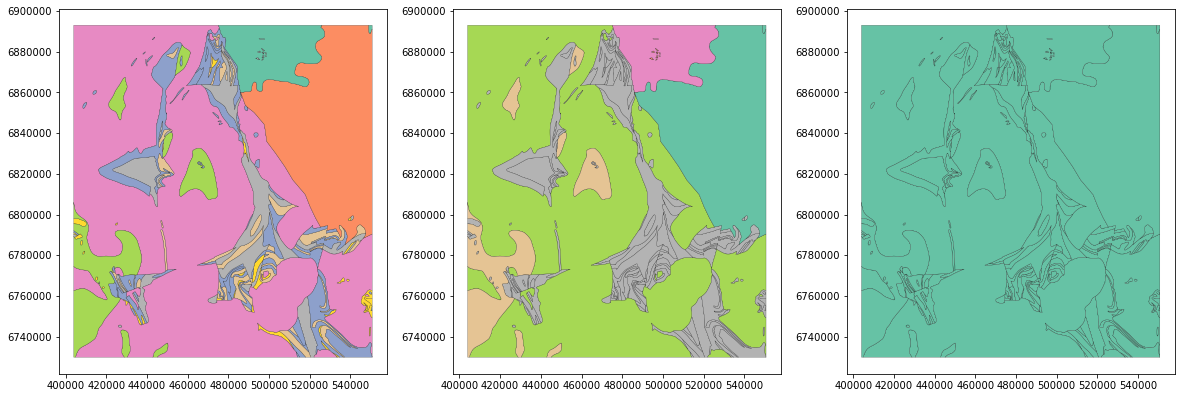

<Figure size 432x288 with 0 Axes>

In [132]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 16))
ax1=ygsb.plot(column='CODE',figsize=(7,7), edgecolor='#000000',linewidth=0.2, cmap='Set2', ax=ax1)
ax2=ygsb.plot(column='UNITNAME',figsize=(7,7), edgecolor='#000000',linewidth=0.2, cmap='Set2', ax=ax2)
ax3=ygsb.plot(column='FORMATION',figsize=(7,7), edgecolor='#000000',linewidth=0.2, cmap='Set2', ax=ax3)
plt.figure()

## Upscale by UNITNAME

For this example, let's try to model at the unit scale:

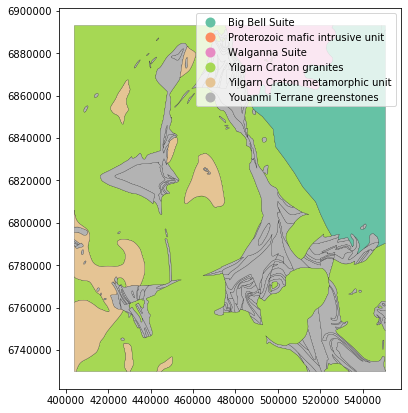

In [121]:
m2l_subsampling.upscale_by (ygsb, 'UNITNAME')

## Vector Aggregation

In this step, we simply geometrically aggregate the polygons with the same unit name.

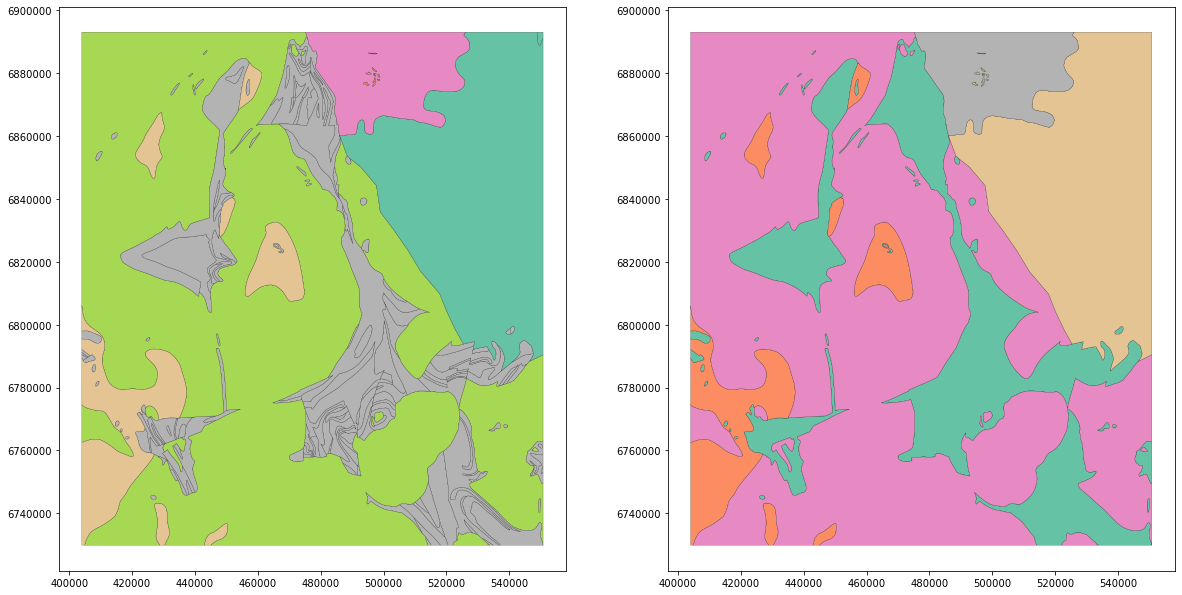

<Figure size 432x288 with 0 Axes>

In [122]:
m2l_subsampling.vector_aggregate (ygsb, 'UNITNAME', 'geometry', aggregate_file)

## Vector Simplification

The next step involves simplifying the vectors while: <br>
1. retaining critical points that define data points and/or salient features <br>
2. preserving overall shape <br>
3. preserving spatial arrangement and topological relationship with adjacent vectors <br>
4.	avoiding topological errors and self-intersections with itself or other vectors <br>
5. balancing area gain and loss

<Figure size 432x288 with 0 Axes>

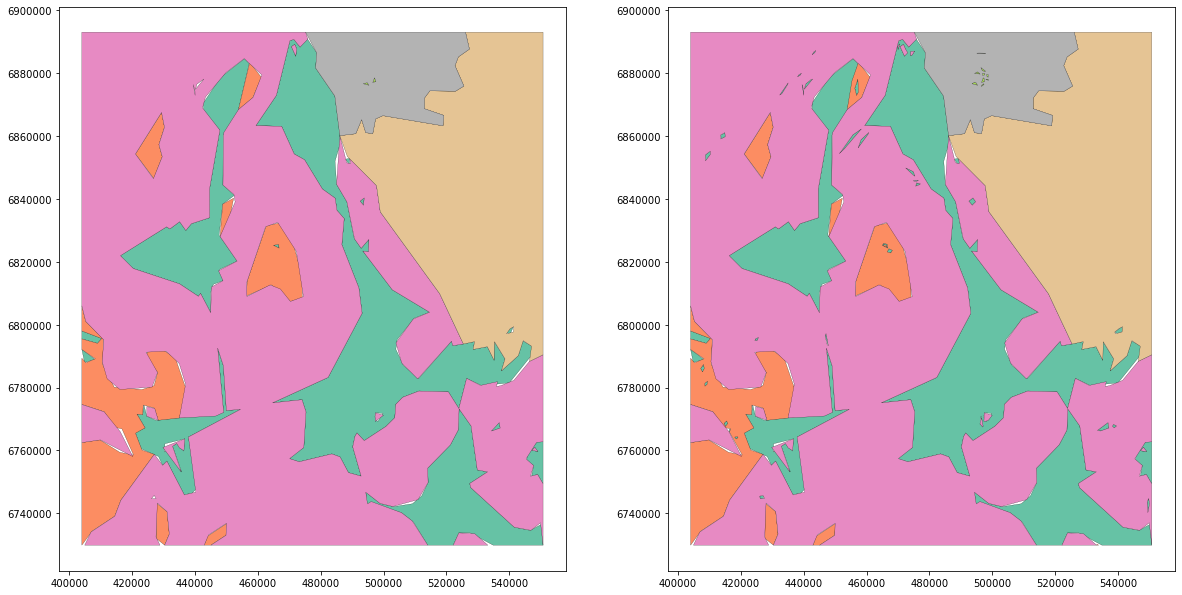

<Figure size 432x288 with 0 Axes>

In [123]:
aggregate = gpd.read_file(aggregate_file)
simplify_false=aggregate.simplify(1000, preserve_topology=False)
simplify_true=aggregate.simplify(1000, preserve_topology=True)
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 16))
ax1=simplify_false.plot(edgecolor='#000000',linewidth=0.2, cmap='Set2', ax=ax1)
ax2=simplify_true.plot(edgecolor='#000000',linewidth=0.2, cmap='Set2', ax=ax2)
plt.figure()

In the simplifcation above, the left one shows the output from using Ramer-Douglas-Peucker (RDP). It is the most well-known vector simplification method as it is easy to implement and its recursive nature lends to a hierarchical structure for multi-scale simplification. It is fast and efficient  for data compression, eliminating redundant details, reducing the number of points used to represent them ( Ramer, 1972; Douglas and Peucker, 1973). 
![SegmentLocal](../graphics/rdp.gif "Segment")
The algorithm begins by connecting the endpoints of a line with a trend line. The distance of each vertex to the trend line is then measured perpendicularly. Vertices closer to the line than the tolerance bandwidth error are eliminated. The line is then divided by the vertex farthest from the trend line, which makes two new trend lines. The remaining vertices are measured against these lines, and the process continues until all vertices within the tolerance are eliminated.

The simplification in the right is using the Visvalignam-Whyatt (VW) algorithm. It is more intuitive, has less perceptible change and preserves shape more precisely.
![SegmentLocal](../graphics/vw.gif "Segment")
The principle of the algorithm is to select the vertices to delete (the less characteristic ones) rather than choosing the vertices to keep (in the Douglas and Peucker algorithm). The selection of vertices to delete is an iterative process, and at each iteration, the triangles formed by three consecutive vertices are computed. If the area of the smallest triangle is smaller than an area tolerance threshold, the middle vertex is deleted, and another iteration starts.

Since the Visvalignam-Whyatt algorithm is more suited for geological information, where the shapes geologists draw actually contain geological information and interpretation, the algorithm has been modified to preserve topological relationship and proximity to adjacent/neighboring polygons
by keeping junctions between polygons and planar self-intersections.

Let's take a look at these results:

No. Of Nodes=  9079
No. Of Nodes=  8030


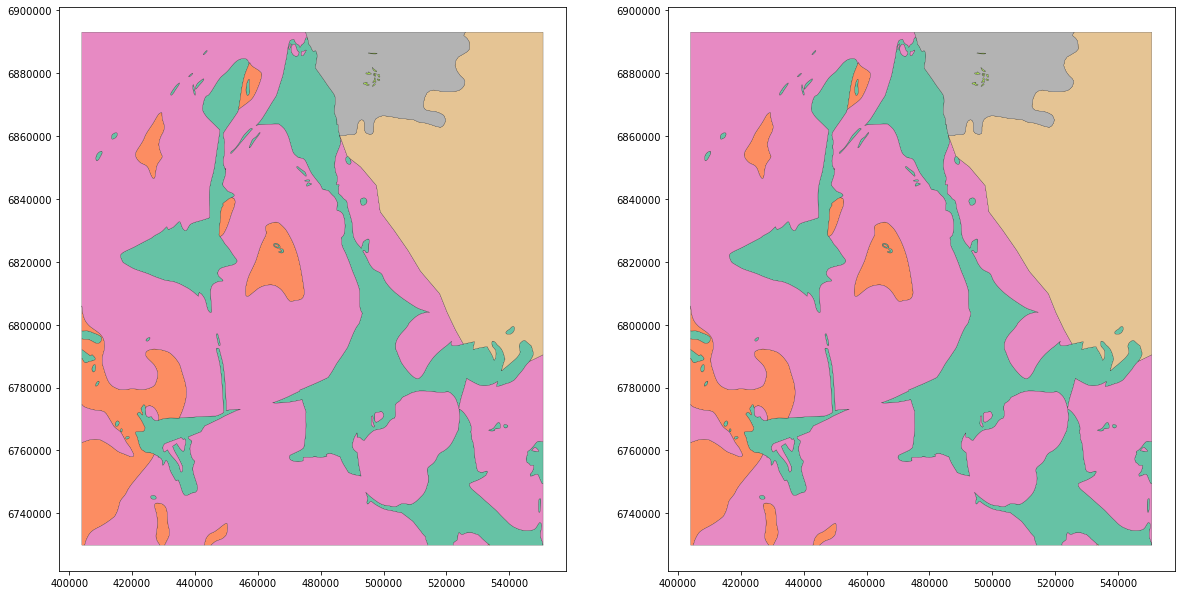

<Figure size 432x288 with 0 Axes>

In [124]:
m2l_subsampling.vector_simplify (aggregate_file, simplified_file, 1000)
simplified = gpd.read_file(simplified_file)
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 16))
ax1=aggregate.plot(edgecolor='#000000',linewidth=0.2, cmap='Set2', ax=ax1)
ax2=simplified.plot(edgecolor='#000000',linewidth=0.2, cmap='Set2', ax=ax2)
plt.figure()
m2l_subsampling.CountNodes (aggregate_file)
m2l_subsampling.CountNodes (simplified_file)

We can see that using the threshold=1000 (from the previous algorithms), the modified VW algorithm visually maintains the same overall shape and topological relationship while reducing the nodes by ~11%. <br>
Now let's test how much more reduction we can do.

In [125]:
a=m2l_subsampling.vector_simplify (aggregate_file, simplified_file_a, 100000)
b=m2l_subsampling.vector_simplify (aggregate_file, simplified_file_b, 1000000)
c=m2l_subsampling.vector_simplify (aggregate_file, simplified_file_c, 2800000)

In [126]:
a=gpd.read_file(simplified_file_a)
b=gpd.read_file(simplified_file_b)
c=gpd.read_file(simplified_file_c)

No. Of Nodes=  2091
No. Of Nodes=  918
No. Of Nodes=  633


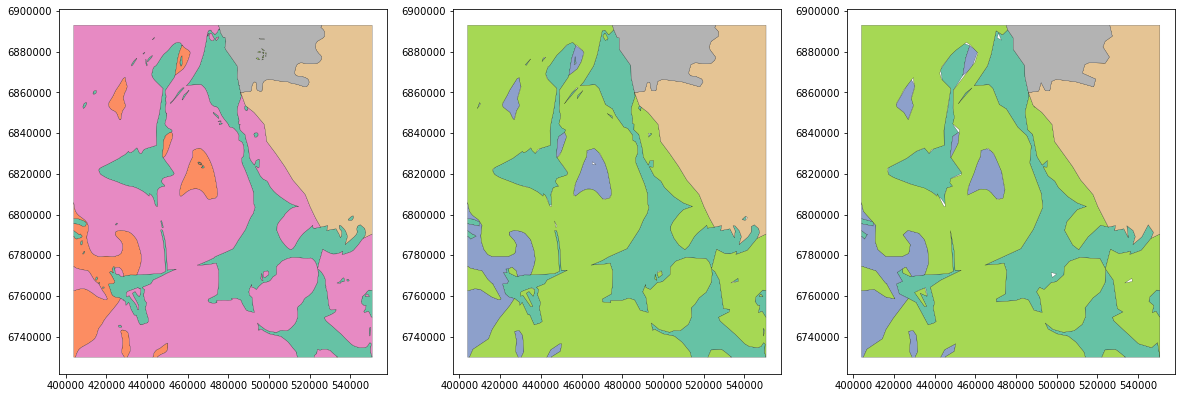

<Figure size 432x288 with 0 Axes>

In [127]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 16))
ax1=a.plot(edgecolor='#000000',linewidth=0.2, cmap='Set2', ax=ax1)
ax2=b.plot(edgecolor='#000000',linewidth=0.2, cmap='Set2', ax=ax2)
ax3=c.plot(edgecolor='#000000',linewidth=0.2, cmap='Set2', ax=ax3)
plt.figure()
m2l_subsampling.CountNodes (simplified_file_a)
m2l_subsampling.CountNodes (simplified_file_b)
m2l_subsampling.CountNodes (simplified_file_c)

The results above show that we can reduce up to a tolerance of 2.8 km2, reducing 93% on the vertices before losing topology. Now let's try to push that a bit more:

In [128]:
d=m2l_subsampling.vector_simplify (aggregate_file, simplified_file_d, 2850000)

AttributeError: 'Polygon' object has no attribute 'geoms'

Oops! That error means that we are losing geometry and topological relationship on one polygon. We can do further simplification if we set the tolerance to be different for each polygon instead of using a global threshold.

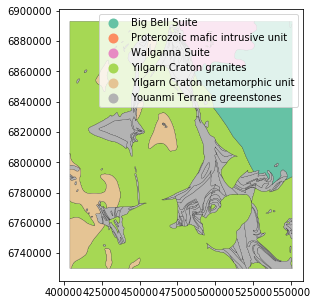

In [140]:
ygsb2 = gpd.read_file(geology_file2)
plot=ygsb.plot(column='UNITNAME',figsize=(5,5), edgecolor='#000000',linewidth=0.2, legend=True, cmap='Set2')
aggregate = gpd.read_file(aggregate_file)

In [ ]:
a=m2l_subsampling.vector_simplify (aggregate_file, simplified_file_a, 100000)
b=m2l_subsampling.vector_simplify (aggregate_file, simplified_file_b, 1000000)
c=m2l_subsampling.vector_simplify (aggregate_file, simplified_file_c, 2800000)
a=gpd.read_file(simplified_file_a)
b=gpd.read_file(simplified_file_b)
c=gpd.read_file(simplified_file_c)
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 16))
ax1=a.plot(edgecolor='#000000',linewidth=0.2, cmap='Set2', ax=ax1)
ax2=b.plot(edgecolor='#000000',linewidth=0.2, cmap='Set2', ax=ax2)
ax3=c.plot(edgecolor='#000000',linewidth=0.2, cmap='Set2', ax=ax3)
plt.figure()
m2l_subsampling.CountNodes (simplified_file_a)
m2l_subsampling.CountNodes (simplified_file_b)
m2l_subsampling.CountNodes (simplified_file_c)